<a href="https://colab.research.google.com/github/subhash-ranjan/football-dataanalysis-pg/blob/main/EPL_2020_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



**Read the dataset**

In [7]:
epl_df = pd.read_csv('/content/EPL_20_21.csv')
# epd_df.head()

**Check null values**

In [8]:
# epl_df.isna().sum()

**Add 2 new columns**

In [9]:
epl_df['MinsPerMatch']=(epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch']=(epl_df['Goals']/epl_df['Matches']).astype(float)

In [10]:
# epl_df.head()

**Total goals**

In [11]:
Total_Goals = epl_df['Goals'].sum()

**Penalty goals**

In [12]:
Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
print(Total_PenaltyGoals)

102


**Penalty attempts**

In [13]:
Total_PenaltyAttempts = epl_df['Penalty_Attempted'].sum()
print(Total_PenaltyAttempts)

125


**Penalties missed vs scored**

In [14]:
plt.figure(figsize=(13,6))
pl_not_scored = Total_PenaltyAttempts - Total_PenaltyGoals
data = [pl_not_scored,Total_PenaltyGoals]
labels = ['Missed','Scored']
color= sns.color_palette('Set2')
# plt.pie(data, labels=labels, colors=color,autopct='%.0f%%')
# plt.show()

<Figure size 936x432 with 0 Axes>

**Unique positions**

In [15]:
epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

**Total forward players**

In [16]:
# epl_df[epl_df['Position']=='FW']


**Most players from which countries**

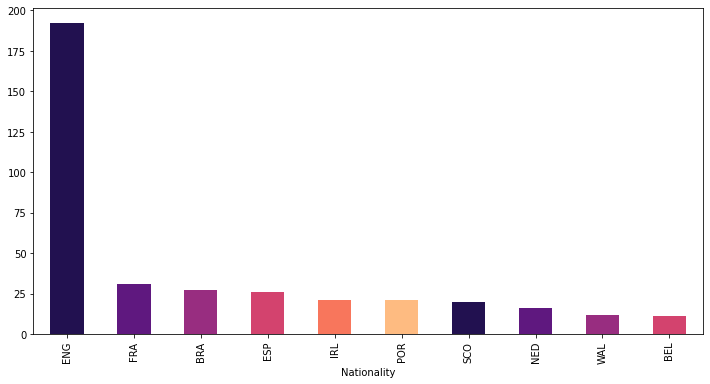

In [21]:
nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar',figsize=(12,6), color= sns.color_palette('magma'))

**Clubs with maximum players in their squad**

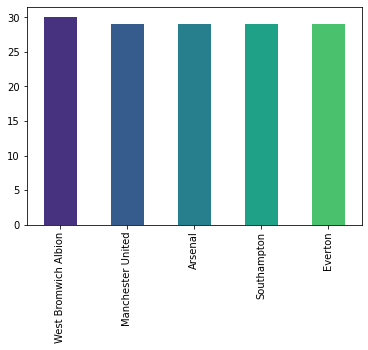

In [23]:
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar',color=sns.color_palette('viridis'))

**Players based on age group**

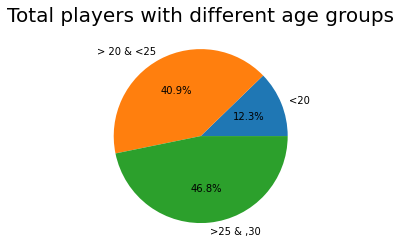

In [30]:
under_20 = epl_df[epl_df['Age']<20]
under_20_25 = epl_df[(epl_df['Age']>20) & (epl_df['Age'] < 25)]
under_25_30 = epl_df[(epl_df['Age']>25) & (epl_df['Age']< 30)]

x = np.array([under_20['Name'].count(), under_20_25['Name'].count(), under_25_30['Name'].count()])
mylabels = ['<20', '> 20 & <25', '>25 & ,30']
plt.title('Total players with different age groups', fontsize= 20)
plt.pie(x, labels= mylabels, autopct="%.1f%%")
plt.show()

